# Exploratory Data Analysis (EDA) for the telecommunication company

## **Project goals**

- Evaluate customer profile on two prepaid plans (revenue, number of calls/messages/etc).
- Analyze clients' behaviour to determine the best prepaid plan. 
- Formulate and test hypotheses.
- Form recommendations for the advertising budget.

## 1. Data Description

In [1]:
# Import libraries numpy, pandas, matplotlib, seaborn, scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats as st
from functools import reduce

Let's upload files with data about the clients of the telecom operator

In [2]:
# Import csv files with data from the external resource
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
plans = pd.read_csv('plans.csv')
users = pd.read_csv('users.csv')

### Table - Calls

In [3]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
# Check the data type and missing values in each table column
calls.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


There are no missing values or data with a strange data type. 

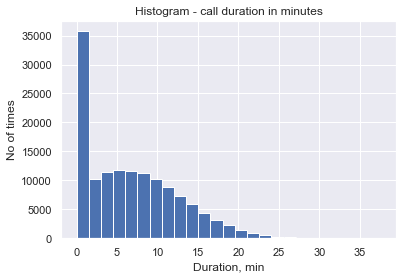

In [5]:
# Create a histogram representing the "call duration in minutes"
plt.hist(calls['duration'], bins=25)
plt.ylabel('No of times')
plt.xlabel('Duration, min')
plt.title('Histogram - call duration in minutes')
plt.show()

The graph shows a large number of calls where the duration is 0 minutes.
These could be either missed or very short calls (< 1 min).

In [6]:
# Count the number of zero values for the duration of calls
calls.query('duration ==0').count()[1]

26834

In [7]:
# Calculate the % of zero values for the duration of calls
((calls.query('duration ==0').count()[1] / calls.query('duration !=0').count()[1])*100).round(decimals=1)

24.2

In [8]:
# Show summary of statistics for column 'duration'
calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [9]:
#Rounding up minutes
calls['duration'] = np.ceil(calls['duration'])

### Table - Internet

In [10]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
# Check the data type and missing values in each table column
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


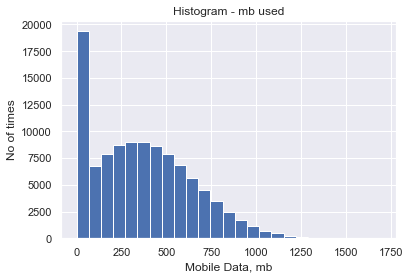

In [12]:
# Create a histogram representing the "mb_used" column
plt.hist(internet['mb_used'], bins=25)
plt.ylabel('No of times')
plt.xlabel('Mobile Data, mb')
plt.title('Histogram - mb used')
plt.show()

Data shows that a lot of internet sessions also have zero values.
These could be potentially very short internet session (<1mb).

In [13]:
# Count the number of zero values for the mb_used
internet.query('mb_used ==0').count()[1]

13747

In [14]:
# Calculate the % of zero values for the duration of calls
((internet.query('mb_used ==0').count()[1] / internet.query('mb_used !=0').count()[1])*100).round(decimals=1)

15.1

In [15]:
# Show summary of statistics for column 'mb_used'
internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [16]:
#Rounding up data used
internet['mb_used'] = np.ceil(internet['mb_used'])

### Table - messages

In [17]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
# Check the data type and missing values in each table column
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Table - Plans

In [19]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Table - Users

In [20]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## 2. Data Preprocessing

### 2.1 Working with Missing Values

A large number of values with zeros were noticed in the variables "call duration" and "Internet session volume". 
Let's assume that the values were filled with zeros because the call duration was less than a minute or the volume of the Internet session was less than a megabyte.
One option would be to exclude this data; however, it represents 24% and 15% of all data. The proposal is to round up zero values to 1 min/MB respectively.

In [21]:
# Round off zero values to 1 minute and change the data type to integer
calls['duration'] = np.where(calls['duration'] == 0, 1, calls['duration']).astype(int)

The proposal is the same for internet data - to replace zero values to 1 MB

In [22]:
# Round off zero values to 1 mb
internet['mb_used'] = np.where(internet['mb_used'] == 0, 1, internet['mb_used'])

### 2.2 Data Types Conversion

Additionally, all dates in data have type - object. Let's convert strings to dates and create a new column "month".

In [23]:
# Table - Messages, convert data type to date
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [24]:
# Table - Users, convert data type to date
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['month'] = pd.DatetimeIndex(users['reg_date']).month

In [25]:
# Table - Internet, convert data type to date
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [26]:
# Table - Calls, convert data type to date
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Let's convert the churn_date column to the datetime type as well. If the user is still a customer of the company, then this column will be blank.

In [27]:
# Churn Date transformation
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['churn_date'] = users['churn_date'].fillna(0)

### 2.3 Creation of new columns

#### Number of calls per month for each user

In [28]:
# Aggregated number of call per user_id and month 
calls_count = calls.groupby(['user_id','month'],as_index=False)['id'].count()
calls_count.columns = ['user_id','month','calls_count']
calls_count.head()

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


#### Sum of minutes used per month for each user

In [29]:
# Sum of minutes per user_id per month 
calls_sum = calls.groupby(['user_id','month'],as_index=False)['duration'].sum()
calls_sum.columns = ['user_id','month','calls_minutes']
calls_sum.head()

,user_id,month,calls_minutes
0,1000,12,124
1,1001,8,187
2,1001,9,326
3,1001,10,411
4,1001,11,441


#### Number of text messages sent per month for each user

In [30]:
# Aggregated number of messages per user_id and month 
messages_count = messages.groupby(['user_id','month'],as_index=False)['id'].count()
messages_count.columns = ['user_id','month','messages_count']
messages_count.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


#### The volume of data used per month for each user

In [31]:
# Data used has been converted to Gb and rounded up per month
internet_traffic = internet.groupby(['user_id','month'],as_index=False)['mb_used'].sum()
internet_traffic.columns = ['user_id','month','gb_total']
internet_traffic['gb_total'] = np.ceil(internet_traffic['gb_total'] / 1024)
internet_traffic.head()

,user_id,month,gb_total
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [32]:
calls_sum

,user_id,month,calls_minutes
0,1000,12,124
1,1001,8,187
2,1001,9,326
3,1001,10,411
4,1001,11,441
...,...,...,...
2253,1498,12,346
2254,1499,9,352
2255,1499,10,397
2256,1499,11,314


#### Merge tables and calculate monthly revenue per user

In [33]:
# Merge tables created in the previous steps 
data_frames = [internet_traffic, messages_count, calls_count, calls_sum]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)

# Merge new table with original data to get information about users and their plan
merge_data1 = pd.merge(df_merged,users[['user_id','plan']],on='user_id', how='left').fillna(0)
merge_data2 = pd.merge(merge_data1,users[['user_id','city']],on='user_id', how='left').fillna(0)
merge_final = merge_data2.merge(plans, left_on='plan', right_on='plan_name').fillna(0)

In [34]:
# Convert mb to GB and rename columns in  the final table
merge_final['mb_per_month_included'] = merge_final['mb_per_month_included']/1024
merge_final = merge_final.rename(columns={'mb_per_month_included': 'gb_per_month_included'})

In [35]:
# Display the final table
merge_final.head()

,user_id,month,gb_total,messages_count,calls_count,calls_minutes,plan,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,2.0,11.0,16.0,124.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
1,1006,11,3.0,15.0,2.0,10.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
2,1006,12,32.0,139.0,9.0,61.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
3,1008,10,17.0,21.0,71.0,493.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
4,1008,11,24.0,37.0,63.0,459.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate


**Monthly revenue per user**

Let's find:
- revenue from messages
- revenue from calls
- revenue from the internet
- additional revenue (the sum of the first three)
- total revenue (additional + monthly charge)

In [36]:
# Calculate revenue from messages
merge_final['message_revenue'] = np.where((merge_final['messages_included'] - merge_final['messages_count']<0), abs(merge_final['usd_per_message']*(merge_final['messages_included']-merge_final['messages_count'])), 0)

# Calculate revenue from calls
merge_final['calls_revenue'] = np.where((merge_final['minutes_included'] - merge_final['calls_minutes']<0), abs(merge_final['usd_per_minute']*(merge_final['minutes_included']-merge_final['calls_minutes'])), 0)

# Calculate revenue from internet packages
merge_final['internet_revenue'] = np.where((merge_final['gb_per_month_included'] - merge_final['gb_total']<0), (np.ceil((abs((merge_final['gb_per_month_included']-merge_final['gb_total'])))).astype(int)*merge_final['usd_per_gb']), 0)

# Aggregate additional revenue from messages, calls of internet above customer plan
merge_final['add_revenue'] = merge_final['message_revenue'] + merge_final['calls_revenue'] + merge_final['internet_revenue']

# Aggregate total revenue which consists of additional revenue and cost of the plan
merge_final['total_revenue'] = merge_final['add_revenue'] + merge_final['usd_monthly_pay']

In [37]:
# Show aggregated table
merge_final.head()

,user_id,month,gb_total,messages_count,calls_count,calls_minutes,plan,city,messages_included,gb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,message_revenue,calls_revenue,internet_revenue,add_revenue,total_revenue
0,1000,12,2.0,11.0,16.0,124.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,...,70,7,0.01,0.01,ultimate,0.0,0.0,0,0.0,70.0
1,1006,11,3.0,15.0,2.0,10.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,...,70,7,0.01,0.01,ultimate,0.0,0.0,0,0.0,70.0
2,1006,12,32.0,139.0,9.0,61.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,...,70,7,0.01,0.01,ultimate,0.0,0.0,14,14.0,84.0
3,1008,10,17.0,21.0,71.0,493.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,...,70,7,0.01,0.01,ultimate,0.0,0.0,0,0.0,70.0
4,1008,11,24.0,37.0,63.0,459.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,...,70,7,0.01,0.01,ultimate,0.0,0.0,0,0.0,70.0


## 3. Exploratory Data Analysis

Let's analyze the behavior of customers based on the provided data. We will find out how many minutes of conversation, how many messages and how much Internet traffic is required by users of each plan per month.

**Data for Ultimate plan**

In [38]:
# Let's select data with users who use the Ultimate plan
plan_ultimate = merge_final.query('plan_name == "ultimate"')

# Show descriptive statistics
plan_ultimate[['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue']].describe()

,gb_total,messages_count,calls_minutes,add_revenue,total_revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,17.336111,37.551389,442.431944,2.333333,72.333333
std,7.677674,34.767179,246.730647,11.498322,11.498322
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,13.000000,7.000000,268.000000,0.000000,70.000000
50%,17.000000,30.000000,437.500000,0.000000,70.000000
75%,21.000000,61.000000,579.000000,0.000000,70.000000
max,46.000000,166.000000,1404.000000,112.000000,182.000000


**On Ultimate plan** users on average use less than the plan provides. On average, a user needs 16.8 GB of traffic, 46.5 messages and 405 minutes of calls.
**Average revenue from additional services** for this plan is very insignificant (~ 2.2$) because users have high enough package limits for calls and messages.

However, there are some outliers with significant additional (112$) and total revenue which means that there are some customers who use mobile services very frequently. 

In [39]:
# Let's calculate the total revenue from the Ultimate plan
plan_ultimate_rev = plan_ultimate['total_revenue'].sum().astype(int)
print('Total revenue per year:', plan_ultimate_rev, '$')

# Show variance for the columns
print('\nShow variance for the columns:')
print(np.var(plan_ultimate[['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue']]))

Total revenue per year: 52080 $

Show variance for the columns:
gb_total             58.864807
messages_count     1207.077915
calls_minutes     60791.462035
add_revenue         132.027778
total_revenue       132.027778
dtype: float64


For most variables, we see a normal distribution. Only for the "message" variable we see a histogram with positive skewness, which may be a consequence of the use of social networks instead of regular messages. Histograms confirm a wide range of values. As mentioned before there are some outliers and unevenly distributed values.

**Data for Surf plan**

In [40]:
# Highlight data with users who use Surf plan
plan_surf = merge_final.query('plan_name == "surf"')

# Show statistical description of the data
plan_surf[['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue']].describe()

,gb_total,messages_count,calls_minutes,add_revenue,total_revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,16.688493,31.159568,440.324221,41.019841,61.019841
std,7.853921,33.566717,240.299284,55.536574,55.536574
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,12.000000,3.000000,280.000000,0.000000,20.000000
50%,17.000000,24.000000,438.000000,20.660000,40.660000
75%,21.000000,47.000000,591.000000,60.870000,80.870000
max,70.000000,266.000000,1548.000000,571.270000,591.270000


**On the Surf plan** customers use on average almost all available traffic, messages and calls. On average, a user needs 16.2 GB of traffic, 39 messages and 408 minutes.
**Average revenue from additional services** for this plan is significantly higher than from Ultimate (39.8$). Customers generally consume less on this plan than on Ultimate but buy more additional options.
The deviations from the average values are less than in the Ultimate plan.

In [41]:
# Calculate the total revenue from the plan
plan_surf_rev = plan_surf['total_revenue'].sum().astype(int)
print('Total revenue per year:', plan_surf_rev, '$')

# Show variance of the columns
print('\nShow variance for the columns:')
print(np.var(plan_surf[['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue']]))

Total revenue per year: 95984 $

Show variance for the columns:
gb_total             61.644858
messages_count     1126.008232
calls_minutes     57707.036648
add_revenue        3082.350256
total_revenue      3082.350256
dtype: float64


**Let's build histograms and boxplots** for selected columns for the Surf and Ultimate plan

In [42]:
# Create titles for graphs
features = ['gb_total','messages_count','calls_count','calls_minutes','add_revenue']
suptitle = ['Distribution of traffic per plan', 'Distribution of messages per plan', 'Distribution of number of calls per plan','Distribution of calls duration per plan', 'Distribution of additional revenue per plan']

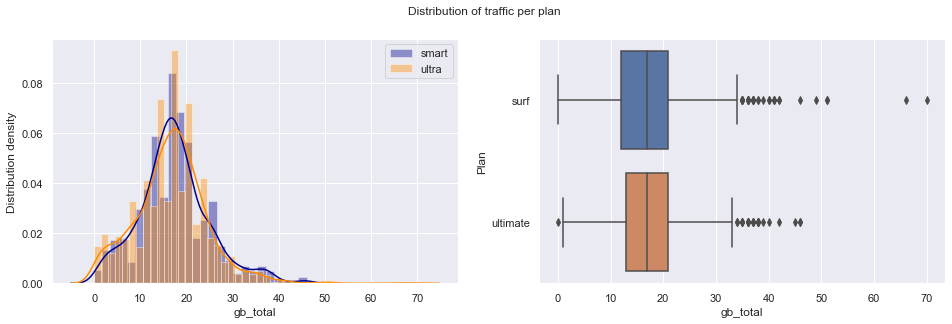

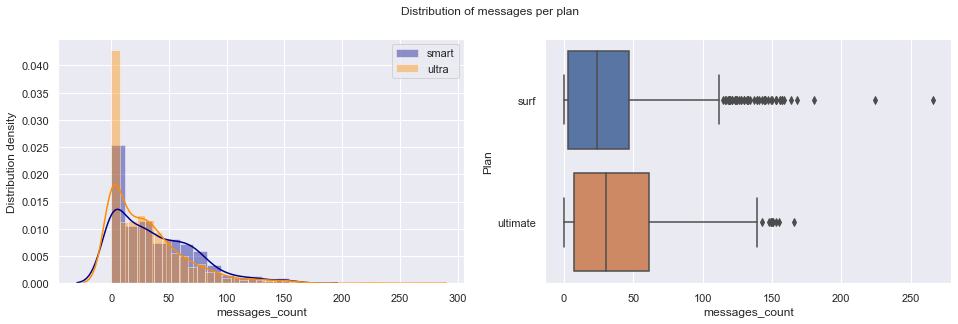

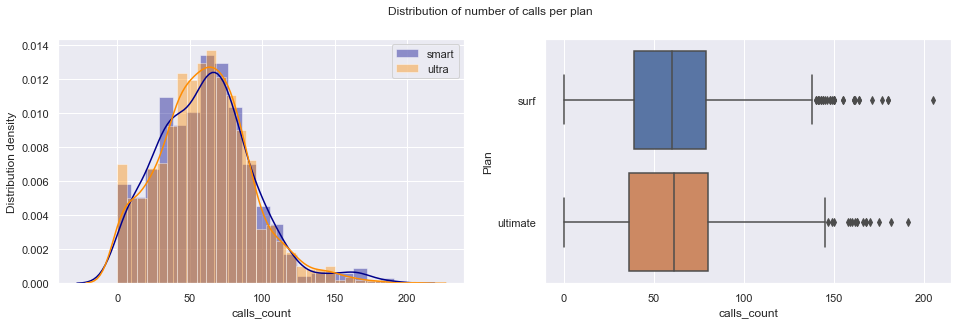

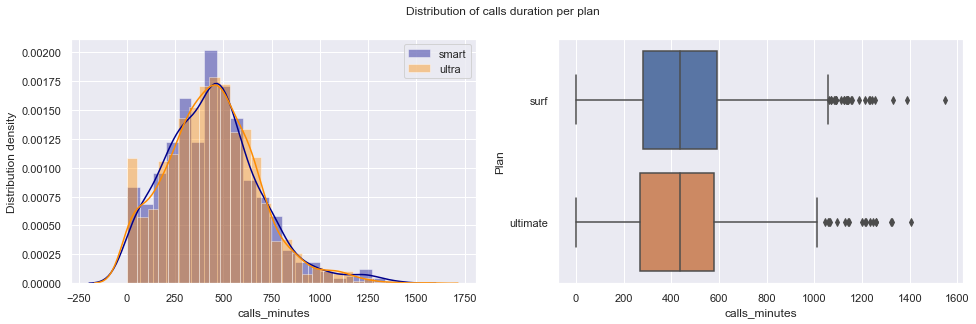

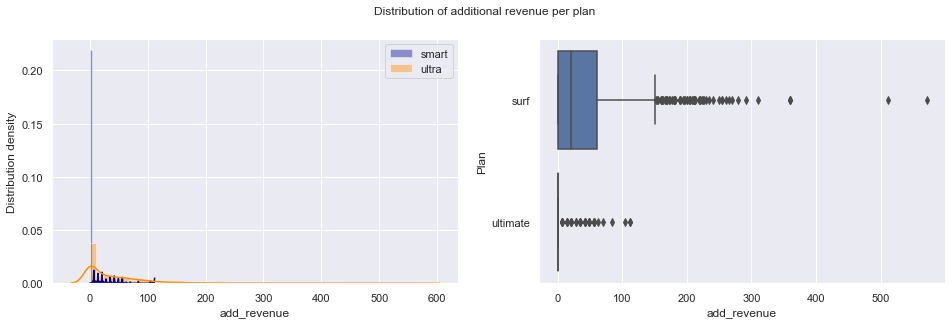

In [43]:
# Create subplots with histograms and boxplots for each feature and plan
for i in range(len(features)):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4.5))
    sns.distplot(plan_ultimate[features[i]], color='darkblue', ax=axes[0])
    sns.distplot(plan_surf[features[i]], color='darkorange', ax=axes[0])
    sns.boxplot(data=merge_final.sort_values(by='plan_name'), x=features[i], y='plan_name', ax=axes[1])
    axes[0].legend(loc='upper right', labels=['smart','ultra'])
    axes[0].set_xlabel(features[i])
    axes[0].set_ylabel('Distribution density')
    axes[1].set_xlabel(features[i])
    axes[1].set_ylabel('Plan')
    fig.suptitle(suptitle[i])
    plt.show();

The behavior of some users on Ultimate plan is very different from the average. For example, with an average call duration (550 minutes), we see a strong variation from 0 to 1500 minutes. For a Ultimate plan, a scattered data could be potentially explained business customers.
It can be assumed that increasing limits on messages or call minutes will not attract new customers as current limits are already sufficient enought. However, data package could be pottentially extended. 
Additionally, a new unlimited plan for business or premium customers could be proposed. 

On the Surf plan for all variables except for the number of messages, we see a normal distribution. For revenue and messages, histograms have positive skew. The data is more evenly distributed compared to the data for the Ultimate plan. The reason may be, for example, a larger sample or more predictable user behavior (e.g lack of high check customers).

Boxplots confirm normal distribution for variables in the dataset. It can be observed that there is a lower variability of observations comparing to the Ultimate plan. However, some outliers are still present.

## 4. Hypothesis testing

**Let's formulate the first hypothesis:**

**Zero H₀:** The average revenue from users of Ultimate and Surf plans is equal.

**Alternative:** The average revenue of different plans is different.

Our goal is to test the two-sided (since the change can be in any direction) **hypothesis of equality of two independent data sets**. We will take the generally accepted value of 5% (2.5% for each side) as statistical significance threshold. To test the hypothesis, we will use the scipy.stats.ttest_ind method, where the function arguments will be the monthly total revenue for each user of the surf and ultimate plans. Plan dispersions differ significantly due to the fact that the Surf plan has more revenue from sales of additional services. Therefore, the equal_val variable (which determines whether the variances of the samples are equal) will take the argument False.

In [44]:
interested_value = plan_ultimate['total_revenue'].mean()
    
alpha = .05 # statistical significance threshold 
    
results = st.ttest_ind(
    plan_surf['total_revenue'], 
    plan_ultimate['total_revenue'],
    equal_var = False)  # Variances of data sets are different
    
print('p-value: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value:  1.8116606400597056e-14
Reject null hypothesis


The null hypothesis was rejected. The probability that the revenue is approximately equal is significantly less than the level of statistical significance (2.5%). It can be concluded that the revenue from the two plans (Ultimate and Surf) is different.

**Let's formulate the second hypothesis:**

**Null hypothesis H₀:** The average revenue from users in NY-NJ area is equal from that of the users from other regions.

**Alternative hypothesis:** The average revenue from users in NY-NJ area is different from that of the users from other regions.

As for the first situation, let us apply the **hypothesis that the means of two general populations are equal**. The first sample will contain data about users from NY-NJ and the second sample contains information about users from the regions.

In [45]:
# Select data with users from NY-NJ
users_ny = merge_final.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
users_regions = merge_final.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

Compare the variance of the samples to determine the value of the equal_var variable.

In [46]:
# Let's check if we can consider the variances of the general populations to be approximately equal
print('\nShow variance for NY-NJ customers:')
print(np.var(users_ny[['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue']]))
print('\nShow variance for customers from other regions:')
print(np.var(users_regions[['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue']]))


Show variance for NY-NJ customers:
gb_total             53.834517
messages_count      770.896298
calls_minutes     45680.369270
add_revenue        1997.174931
total_revenue      1894.600157
dtype: float64

Show variance for customers from other regions:
gb_total             62.244883
messages_count     1227.056098
calls_minutes     61233.561903
add_revenue        2571.266688
total_revenue      2235.897871
dtype: float64


In [47]:
alpha = .05 # statistical significance threshold 
    
results = st.ttest_ind(
    users_regions['total_revenue'], 
    users_ny['total_revenue'],
    equal_var = True) # We will assume that the variances of the samples are approximately the same. 
    
print('p-value: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value:  0.047580137213587455
Reject null hypothesis


The null hypothesis was rejected.  It can be concluded that the averege revenue is different between customers from NY-NJ and other regions.

## 5. Overall conclusion

Let's build a pivot table where the average values of the variables for the city are sorted by additional revenue per month.

In [48]:
merge_final.pivot_table(['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue'],
               ['city', 'plan_name'], aggfunc='mean').sort_values(by='add_revenue', ascending=False).head(10)

,,add_revenue,calls_minutes,gb_total,messages_count,total_revenue
city,plan_name,,,,,
"Albany-Schenectady-Troy, NY MSA",surf,128.448000,500.600000,27.600000,85.200000,148.448000
"Colorado Springs, CO MSA",surf,125.661818,449.181818,27.545455,0.000000,145.661818
"Baton Rouge, LA MSA",surf,99.360952,712.000000,21.904762,12.095238,119.360952
"Urban Honolulu, HI MSA",surf,93.183810,473.190476,21.714286,42.190476,113.183810
"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,89.499500,434.550000,22.850000,37.000000,109.499500
"Fresno, CA MSA",surf,85.907667,424.700000,22.400000,22.766667,105.907667
"St. Louis, MO-IL MSA",surf,85.043333,746.000000,16.000000,63.000000,105.043333
"Dayton-Kettering, OH MSA",surf,76.852222,620.222222,22.222222,6.222222,96.852222
"Minneapolis-St. Paul-Bloomington, MN-WI MSA",surf,71.371333,723.100000,19.866667,88.500000,91.371333


On the Surf plan, users spend more on additional services (calls and the Internet). At the same time, we see that customers from regions with Surf plan provide the highest additional and total revenue.

Two hypotheses have been tested, where it turned out that the average revenue from the Ultimate plan differs from the Surf plan. Due to additional purchases on the Surf plan, total revenue can fluctuate significantly.
The second hypothesis that the average revenues from clients from the regions and NY-NJ are approximately equal has also been rejected. 

Let's build a pivot table with average values of variables for each plan.

In [49]:
merge_final.pivot_table(['gb_total','messages_count','calls_minutes','add_revenue', 'total_revenue'],
               ['plan_name'], aggfunc='mean')

,add_revenue,calls_minutes,gb_total,messages_count,total_revenue
plan_name,,,,,
surf,41.019841,440.324221,16.688493,31.159568,61.019841
ultimate,2.333333,442.431944,17.336111,37.551389,72.333333


On average, a user of the Ultimate plan pays 12.45$ per month more than a customer on a Surf plan. But since there are more users of the Surf plan, the total revenue from the Surf plan is higher than from the Ultimate plan. At the same time, it could be challenging to attract new customers to the Ultimate plan due to the high price and not benefitial for the average customer package limits. Ultimate plan may be interesting only for people who on average exceeds Surf package limis or have a high volatility of this consumption per month.

The Surf plan generally brings more additional revenue than the Ultimate plan. In this case, the advertising campaign for the Ultimate plan can be aimed at attracting business customers, while the main advertising budget can be used for the Surf plan.